# Experiment 1: Various Active Learning Methods
This notebook shows the experiments for running each active learning method with zero-shot transfer learning on each dataset. The underyling acquisition function is uncertainty in each case. This corresponds to the "Time consumption and accuracy comparison experiment among different active learning sampling methods" experiment in the paper. The bottom of this document also contains the detailed plots of these experiments (over time). 

Methods:
- LocalMax
- Random
- TopMax
- Acq_Sample
- Sequential

Datasets:
- MSTAR
- OpenSARShip
- FUSAR-Ship

In [1]:
#Check the GPU and RAM
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Sat Jan  7 15:34:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    51W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#Mount drive and install python packages
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('drive/MyDrive/SAR_BAL')

Mounted at /content/drive


In [3]:
!pip install graphlearning annoy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.0/648.0 KB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for graphlearning: filename=graphlearning-1.2.1-cp38-cp38-linux_x86_64.whl size=143759 sha256=53027b2a33ba4bbae604a42baa88cb22aced2245d6b992cb02f543712e3a3466
  Stored in directory: /root/.cache/pip/wheels/5e/84/62/681cf2c2a59f1f5e58d52fb110e2eb4c93c9c808d932829543
  Created wheel for annoy: filename=annoy-1.17.1-cp38-cp38-linux_x86_64.whl size=396909 sha256=138a693f5c082608e52b8c4528f8276c2e94703b771202619ab8ff0ba5717212
  Stored in directory: /root/.cache/pip/wheels/f9/93/19/30511c4a9ae6b4937455a134c34a39e13943e2c6f46fcd2ed2
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any

In [4]:
import pandas as pd

from experiments import experiment_1, experiment_1_simple_plotter, experiment_1_full_save, EXPERIMENT_1_SAVE_PATH
from models import CVAE

## Parameters

In [5]:
#Non-default Parameters

HARDWARE_ACCELERATION = True
acq_fun_list = ['uc']

## Experiments

In [6]:
acc_mstar, time_mstar, num_labels_mstar, full_acc_mstar = experiment_1(
    'mstar', 
    hardware_acceleration=HARDWARE_ACCELERATION,
)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [7]:
acc_open_sar, time_open_sar, num_labels_open_sar, full_acc_open_sar = experiment_1(
    'open_sar_ship',
    hardware_acceleration=HARDWARE_ACCELERATION,
)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [8]:
acc_fusar, time_fusar, num_labels_fusar, full_acc_fusar = experiment_1(
    'fusar',
    hardware_acceleration=HARDWARE_ACCELERATION,
)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X0_5_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X0_5_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/shufflenetv2_x0.5-f707e7126e.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x0.5-f707e7126e.pth


  0%|          | 0.00/5.28M [00:00<?, ?B/s]

## Accuracy Results

In [9]:
#Create pandas dataframe
acc_results = {'mstar': acc_mstar, 'open_sar_ship': acc_open_sar, 'fusar': acc_fusar}
df_acc = pd.DataFrame.from_dict(acc_results, orient='index')

#Save
df_acc.to_pickle(EXPERIMENT_1_SAVE_PATH + 'Pickles/accuracy_table.pkl')

#Display data
print("Accuracy")
print(df_acc)

Accuracy
               local_max     random   topn_max  acq_sample  global_max
mstar          43.179873  40.013692  41.536882   42.871812   44.052713
open_sar_ship  80.643001  68.318821  80.509042   70.730074   79.705291
fusar          88.352638  67.245817  86.164736   74.839125   89.575290


## Time Results

In [10]:
#Create pandas dataframe
time_results = {'mstar': time_mstar, 'open_sar_ship': time_open_sar, 'fusar': time_fusar}
df_time = pd.DataFrame.from_dict(time_results, orient='index')

#Save
df_time.to_pickle(EXPERIMENT_1_SAVE_PATH + 'Pickles/time_table.pkl')

#Display data
print("Time")
print(df_time)

Time
               local_max     random   topn_max  acq_sample  global_max
mstar          23.158130  22.161195  22.197264   21.251622  282.031198
open_sar_ship   5.129772   4.774559   4.750874    5.628643   46.146508
fusar          26.867940  21.417511  25.341851   21.657775  321.505822


## MSTAR Detailed Plots

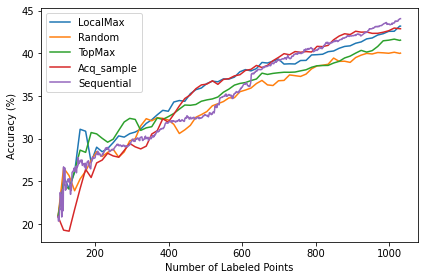

In [11]:
experiment_1_simple_plotter(num_labels_mstar, full_acc_mstar, dataset='mstar')

## OpenSARShip Detailed Plots

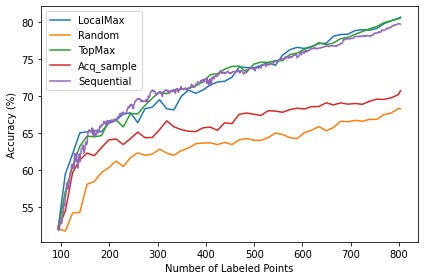

In [12]:
experiment_1_simple_plotter(num_labels_open_sar, full_acc_open_sar, dataset='open_sar_ship')

## FUSAR-Ship Detailed Plots

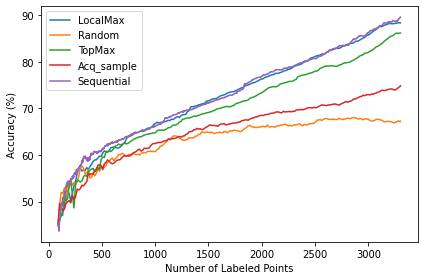

In [13]:
experiment_1_simple_plotter(num_labels_fusar, full_acc_fusar, dataset='fusar')

## Saving Plots with SoTA

MSTAR


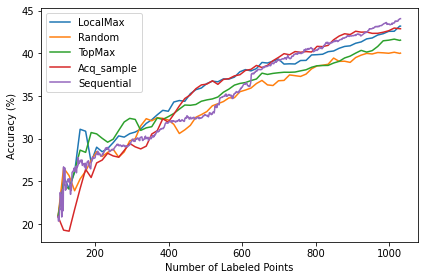

OpenSARShip


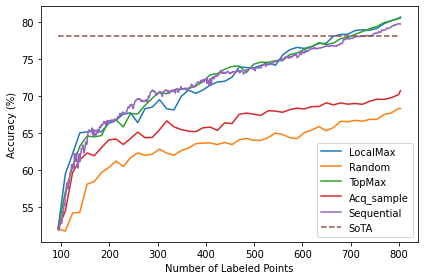

FUSAR-Ship


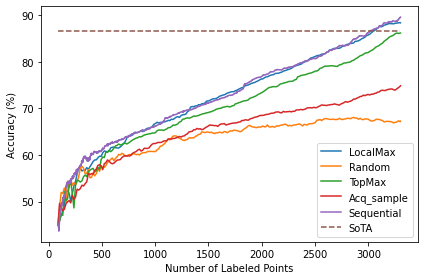

In [14]:
print("MSTAR")
experiment_1_simple_plotter(num_labels_mstar, full_acc_mstar, dataset='mstar', include_sota=True)

print("OpenSARShip")
experiment_1_simple_plotter(num_labels_open_sar, full_acc_open_sar, dataset='open_sar_ship', include_sota=True)

print("FUSAR-Ship")
experiment_1_simple_plotter(num_labels_fusar, full_acc_fusar, dataset='fusar', include_sota=True)

## Save All Data

In [15]:
#MSTAR
experiment_1_full_save(acc_mstar, time_mstar, num_labels_mstar, full_acc_mstar, 'mstar')

#OpenSARShip
experiment_1_full_save(acc_open_sar, time_open_sar, num_labels_open_sar, full_acc_open_sar, 'open_sar_ship')

#FUSAR-Ship
experiment_1_full_save(acc_fusar, time_fusar, num_labels_fusar, full_acc_fusar, 'fusar')

Saving to: Experiment Results/Experiment 1/Pickles/
Saving to: Experiment Results/Experiment 1/Pickles/
Saving to: Experiment Results/Experiment 1/Pickles/
